# Under which conditions one may be lucky enough to not get infected?


Let us denote a small perturbation, $\varepsilon$, in the SIR compartments as:
\begin{align*}
s &= \overline{s} + \varepsilon s \\
i &= \overline{i} + \varepsilon i \\
r &= \overline{r} + \varepsilon r \\
\end{align*}

Consider a system which was initially **at rest** (no infections: $\overline{s} \neq 0, \overline{i} = 0, \overline{r} = 1 - \overline{s} $).

One day, a couple of infectious patients, $ \varepsilon i$,  have returned from holidays.

What are the conditions to prevent the epidemy from growth?

In other words, what proportion of the population should be immunized to eradicate a disease?

To answer this question, we have to insert the small perturbation into the (nondimensional) system of SIR equations :
\begin{align*}
\frac{\partial}{\partial \tau} s &= - R_0 s i \\
\frac{\partial}{\partial \tau} i &= R_0 s i -  i \\
\frac{\partial}{\partial \tau} r &= i
\end{align*}
Expanding,
\begin{align*}
\frac{\partial}{\partial \tau} s &= - R_0 (\overline{s} + \varepsilon s)  \varepsilon i = - R_0 \overline{s} \varepsilon i -  R_0 \overline{s} \varepsilon^2 i \\
\frac{\partial}{\partial \tau} i &= R_0 (\overline{s} + \varepsilon s) \varepsilon i - \varepsilon i =  R_0 \overline{s} \varepsilon i +  R_0 \overline{s} \varepsilon^2 i  - \varepsilon i \\
\frac{\partial}{\partial \tau} r &= \varepsilon  i
\end{align*}

Eliminating the higher order terms, $\varepsilon^2$, the condition of decay of the epidemy is:

\begin{align*}
\frac{\partial}{\partial \tau} i < 0 & \Leftrightarrow ( R_0 \overline{s} - 1 ) \varepsilon i < 0 \\ 
 & \Leftrightarrow  R_0 \overline{s} < 1
\end{align*}

Since $ \overline{s} = 1 - \overline{r}$, the condition can be expressed as:

\begin{align*}
 \frac{\partial}{\partial \tau} i < 0 & \Leftrightarrow  R_0 (1 - \overline{r}) < 1 \\
 & \Leftrightarrow \overline{r} > 1 - \frac{1}{R_0}
\end{align*}

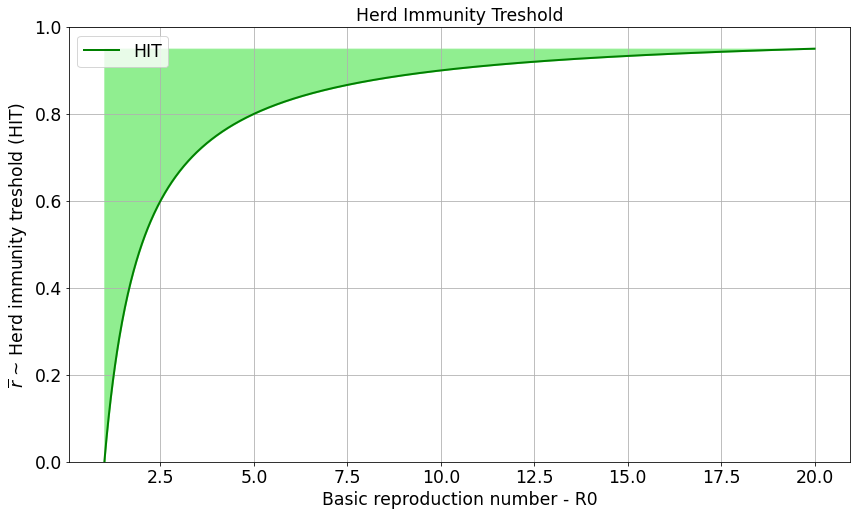

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

R0 = np.linspace(1, 20, 1000)

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (14, 8),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
axes = plt.gca()
y =  1 - 1/R0 
plt.plot(R0, y,
         color="green", marker="", markevery=1, markersize=15, linestyle="-", linewidth=2,
         label='HIT')

plt.fill_between(R0, y,  np.max(y), color='lightgreen')
plt.xlabel('Basic reproduction number - R0')
plt.ylabel(r'$\overline{r} $ ~ Herd immunity treshold (HIT)')
axes.set_ylim([0,1])
plt.title('Herd Immunity Treshold')
plt.legend()
plt.grid()
plt.show()

# Herd immunity vs R0
And the plot from wikipedia

![Herd_immunity_threshold_vs_r0](../images/Herd_immunity_threshold_vs_r0.svg)


# Stability of linear systems

The perturbed, linearized, 0D SIR system can be expressed in matrix form as:

$ 
\underbrace{
\begin{bmatrix}
\dot s \\
\dot i \\
\dot r 
\end{bmatrix}}_{\boldsymbol{\dot x}}
=
\underbrace{
\begin{bmatrix}
0 &  - R_0 \overline{s} & 0 \\
0 &  R_0 \overline{s} -1 & 0 \\
0 & 1 & 0 
\end{bmatrix}}_{\mathbb{A}}
\underbrace{
\begin{bmatrix}
\varepsilon s \\
\varepsilon i \\
\varepsilon r 
\end{bmatrix}}_{\boldsymbol{x}}
$

where $\dot s$ denotes $\frac{\partial}{\partial \tau} s$.

The stability condition for the continous system is $Re(eigenvalues(\mathbb{A})) < \boldsymbol{0}$ (all real parts of the eigenvalues of $\mathbb{A}$ are negative).

Intuition: for ODE, $\dot x = \lambda x \rightarrow x = C e^{\lambda t}$

Again, calculating $eigenvalues(\mathbb{A})$ we obtain condition $R_0 \overline{s} - 1< 0 \Leftrightarrow \overline{r} > 1 - \frac{1}{R_0} $.

The matrix notation would be even more useful if one would like to consider additional couplings to the SIR system (like loss of the immunity of the recovered).

In [2]:
import sympy as sy
R0,s = sy.symbols('R0 s') 

A = sy.Matrix([[0, -R0*s, 0], 
               [0, R0*s-1, 0],
               [0, 1,0]])                                                                                       
 
A.eigenvals() #returns eigenvalues and their algebraic multiplicity

{R0*s - 1: 1, 0: 2}

## Inspirations

Herd Immunity Treshold

- <https://en.wikipedia.org/wiki/Basic_reproduction_number>

Stability of linear systems

- <https://en.wikipedia.org/wiki/Stability_theory>

- <https://www.youtube.com/watch?v=nyqJJdhReiA&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=2&ab_channel=SteveBrunton>

- <https://www.youtube.com/watch?v=h7nJ6ZL4Lf0&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=3&ab_channel=SteveBrunton>


